<a href="https://colab.research.google.com/github/deecod-dev/heart_disease_detection_model/blob/main/Heart_Disease_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#part a and b:

Epoch 100/1000 - Loss: 1.6170 - Accuracy: 0.8503 - Val Loss: 3.4538 - Val Accuracy: 0.1603
Epoch 200/1000 - Loss: 4.6430 - Accuracy: 0.8503 - Val Loss: 2.5630 - Val Accuracy: 0.8397
Epoch 300/1000 - Loss: 1.7557 - Accuracy: 0.8503 - Val Loss: 2.3795 - Val Accuracy: 0.2750
Epoch 400/1000 - Loss: 5.1680 - Accuracy: 0.8503 - Val Loss: 5.1556 - Val Accuracy: 0.8397
Epoch 500/1000 - Loss: 5.1693 - Accuracy: 0.8503 - Val Loss: 5.3110 - Val Accuracy: 0.8397
Epoch 600/1000 - Loss: 0.6730 - Accuracy: 0.8058 - Val Loss: 0.8011 - Val Accuracy: 0.7905
Epoch 700/1000 - Loss: 2.8323 - Accuracy: 0.8503 - Val Loss: 0.8133 - Val Accuracy: 0.7996
Epoch 800/1000 - Loss: 5.1693 - Accuracy: 0.8503 - Val Loss: 5.3038 - Val Accuracy: 0.8397
Epoch 900/1000 - Loss: 1.0078 - Accuracy: 0.8503 - Val Loss: 3.7873 - Val Accuracy: 0.2423
Epoch 1000/1000 - Loss: 1.4686 - Accuracy: 0.8503 - Val Loss: 3.0322 - Val Accuracy: 0.2860
Epoch 100/1000 - Loss: 0.6626 - Accuracy: 0.8503 - Val Loss: 0.6627 - Val Accuracy: 0.839

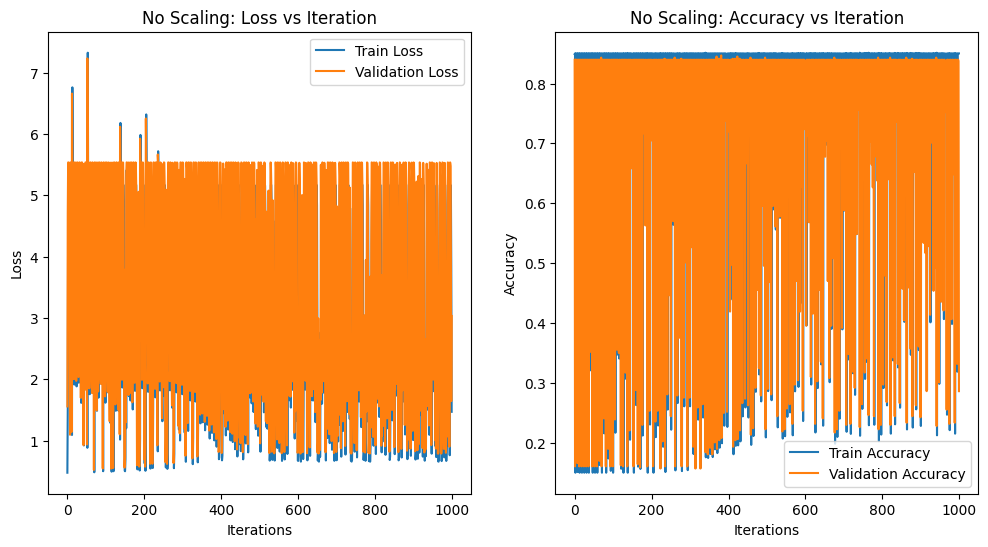

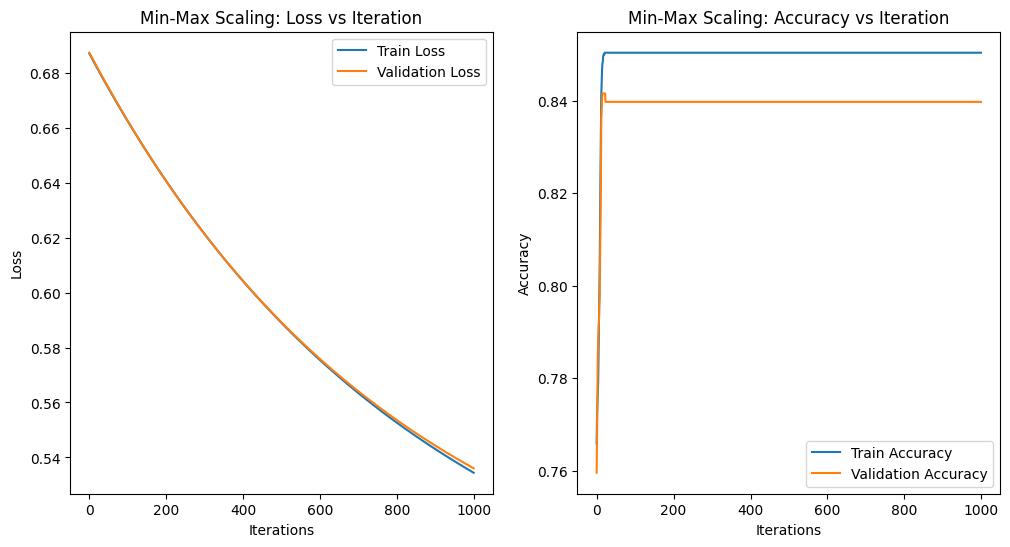

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

\df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/htd1.csv")
df = df.dropna()

\train_df, test_val_df = train_test_split(df, test_size=0.30, random_state=42)
test_df, validation_df = train_test_split(test_val_df, test_size=0.50, random_state=42)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
validation_df.reset_index(drop=True, inplace=True)

x_train = train_df.drop('HeartDisease', axis=1)
y_train = train_df['HeartDisease']
x_test = test_df.drop('HeartDisease', axis=1)
y_test = test_df['HeartDisease']
x_validation = validation_df.drop('HeartDisease', axis=1)
y_validation = validation_df['HeartDisease']

def standard_scaling(df):
    for col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        df[col] = (df[col] - mean) / std

def minmax_scaling(df):
    for col in df.columns:
        min_val = df[col].min()
        max_val = df[col].max()
        df[col] = (df[col] - min_val) / (max_val - min_val)

def initialize_parameters(n_features):
    weights = np.random.randn(n_features) * 0.01
    # weights = np.zeros(n_features)
    bias = 0.0
    return weights, bias

# Logistic Regression functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_propagation(x, weights, bias):
    z = np.dot(x, weights) + bias
    return sigmoid(z)

def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def backward_propagation(x, y_true, y_pred):
    m = x.shape[0]
    error = y_pred - y_true
    gradient_weights = np.dot(x.T, error) / m
    gradient_bias = np.sum(error) / m
    return gradient_weights, gradient_bias

def update_parameters(weights, bias, gradient_weights, gradient_bias, learning_rate):
    weights -= learning_rate * gradient_weights
    bias -= learning_rate * gradient_bias
    return weights, bias

def gradient_descent(x_train, y_train, x_val, y_val, weights, bias, learning_rate, epochs):
    history = {'loss': [], 'accuracy': []}
    val_history = {'loss': [], 'accuracy': []}

    for epoch in range(epochs):
        y_pred_train = forward_propagation(x_train, weights, bias)#linear model and sigmoid de diya
        train_loss = binary_cross_entropy(y_train, y_pred_train)
        history['loss'].append(train_loss)

        gradient_weights, gradient_bias = backward_propagation(x_train, y_train, y_pred_train)#dw and dw
        weights, bias = update_parameters(weights, bias, gradient_weights, gradient_bias, learning_rate)#update eqn

        train_predictions = (y_pred_train >= 0.5).astype(int)
        train_accuracy = np.mean(train_predictions == y_train)
        history['accuracy'].append(train_accuracy)

        # Validation step
        y_pred_val = forward_propagation(x_val, weights, bias)
        val_loss = binary_cross_entropy(y_val, y_pred_val)
        val_history['loss'].append(val_loss)

        val_predictions = (y_pred_val >= 0.5).astype(int)
        val_accuracy = np.mean(val_predictions == y_val)
        val_history['accuracy'].append(val_accuracy)

        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs} - Loss: {train_loss:.4f} - Accuracy: {train_accuracy:.4f} - Val Loss: {val_loss:.4f} - Val Accuracy: {val_accuracy:.4f}")

    return weights, bias, history, val_history


x_train_std = x_train.copy()
x_test_std = x_test.copy()
x_val_std = x_validation.copy()

x_train_minmax = x_train.copy()
x_test_minmax = x_test.copy()
x_val_minmax = x_validation.copy()

# # Standard scaling
# standard_scaling(x_train_std)
# standard_scaling(x_test_std)
# standard_scaling(x_val_std)

minmax_scaling(x_train_minmax)
minmax_scaling(x_test_minmax)
minmax_scaling(x_val_minmax)



weights_std, bias_std = initialize_parameters(x_train_std.shape[1])
weights_minmax, bias_minmax = initialize_parameters(x_train_minmax.shape[1])

learning_rate = 0.001
epochs = 1000

weights_std, bias_std, history_std, val_history_std = gradient_descent(
    x_train_std, y_train, x_val_std, y_validation, weights_std, bias_std, learning_rate, epochs
)

weights_minmax, bias_minmax, history_minmax, val_history_minmax = gradient_descent(
    x_train_minmax, y_train, x_val_minmax, y_validation, weights_minmax, bias_minmax, learning_rate, epochs
)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_std['loss'], label='Train Loss')
plt.plot(val_history_std['loss'], label='Validation Loss')
# plt.title('Standard Scaling: Loss vs Iteration')
plt.title('No Scaling: Loss vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_std['accuracy'], label='Train Accuracy')
plt.plot(val_history_std['accuracy'], label='Validation Accuracy')
# plt.title('Standard Scaling: Accuracy vs Iteration')
plt.title('No Scaling: Accuracy vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Plotting training vs validation loss and accuracy for Min-Max scaling
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_minmax['loss'], label='Train Loss')
plt.plot(val_history_minmax['loss'], label='Validation Loss')
plt.title('Min-Max Scaling: Loss vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_minmax['accuracy'], label='Train Accuracy')
plt.plot(val_history_minmax['accuracy'], label='Validation Accuracy')
plt.title('Min-Max Scaling: Accuracy vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

No convergence, so I had to scale the data, but after using min max scaling, the graphs for accuaracy (to 0.9) and loss are converging to a value (to 0.54).

#part c:

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Function to evaluate model performance on validation set
def evaluate_model(x_val, y_val, weights, bias):
    y_pred_prob = forward_propagation(x_val, weights, bias)
    y_pred = (y_pred_prob >= 0.5).astype(int)

    conf_matrix = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_prob)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # Plotting the ROC curve
    # fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    # plt.figure()
    # plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    # plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('Receiver Operating Characteristic (ROC) Curve')
    # plt.legend(loc="lower right")
    # plt.show()


standard_scaling(x_train_std)
standard_scaling(x_test_std)
standard_scaling(x_val_std)
# Evaluate Standard scaled model on validation set
print("Evaluation of Standard Scaled Model:")
evaluate_model(x_val_std, y_validation, weights_std, bias_std)
# evaluate_model(x_val_minmax, y_validation, weights_minmax, bias_minmax)

# Evaluate Min-Max scaled model on validation set
# print("Evaluation of Min-Max Scaled Model:")
# evaluate_model(x_val_minmax, y_validation, weights_minmax, bias_minmax)

Evaluation of Standard Scaled Model:
Confusion Matrix:
[[239 222]
 [ 33  55]]
Precision: 0.1986
Recall: 0.6250
F1 Score: 0.3014
ROC-AUC Score: 0.6143


The Recall is hihg => my model is detecting true positives more (TP/TP+FP)
though the precision is low and F1 is 30% => 30% were correct, ROC is 62% telling that it differs between true and false cases on a fine level.

#part d:


Training using Stochastic Gradient Descent (SGD):
Epoch 100/1000 - Loss: 0.3672 - Accuracy: 0.8574 - Val Loss: 0.4116 - Val Accuracy: 0.8434 - Test Loss: 0.3933 - Test Accuracy: 0.8540
Epoch 200/1000 - Loss: 0.3672 - Accuracy: 0.8574 - Val Loss: 0.4116 - Val Accuracy: 0.8434 - Test Loss: 0.3933 - Test Accuracy: 0.8540
Epoch 300/1000 - Loss: 0.3672 - Accuracy: 0.8574 - Val Loss: 0.4116 - Val Accuracy: 0.8434 - Test Loss: 0.3933 - Test Accuracy: 0.8540
Epoch 400/1000 - Loss: 0.3672 - Accuracy: 0.8574 - Val Loss: 0.4116 - Val Accuracy: 0.8434 - Test Loss: 0.3933 - Test Accuracy: 0.8540
Epoch 500/1000 - Loss: 0.3672 - Accuracy: 0.8574 - Val Loss: 0.4116 - Val Accuracy: 0.8434 - Test Loss: 0.3933 - Test Accuracy: 0.8540
Epoch 600/1000 - Loss: 0.3672 - Accuracy: 0.8574 - Val Loss: 0.4116 - Val Accuracy: 0.8434 - Test Loss: 0.3933 - Test Accuracy: 0.8540
Epoch 700/1000 - Loss: 0.3672 - Accuracy: 0.8574 - Val Loss: 0.4116 - Val Accuracy: 0.8434 - Test Loss: 0.3933 - Test Accuracy: 0.8540
Epoc

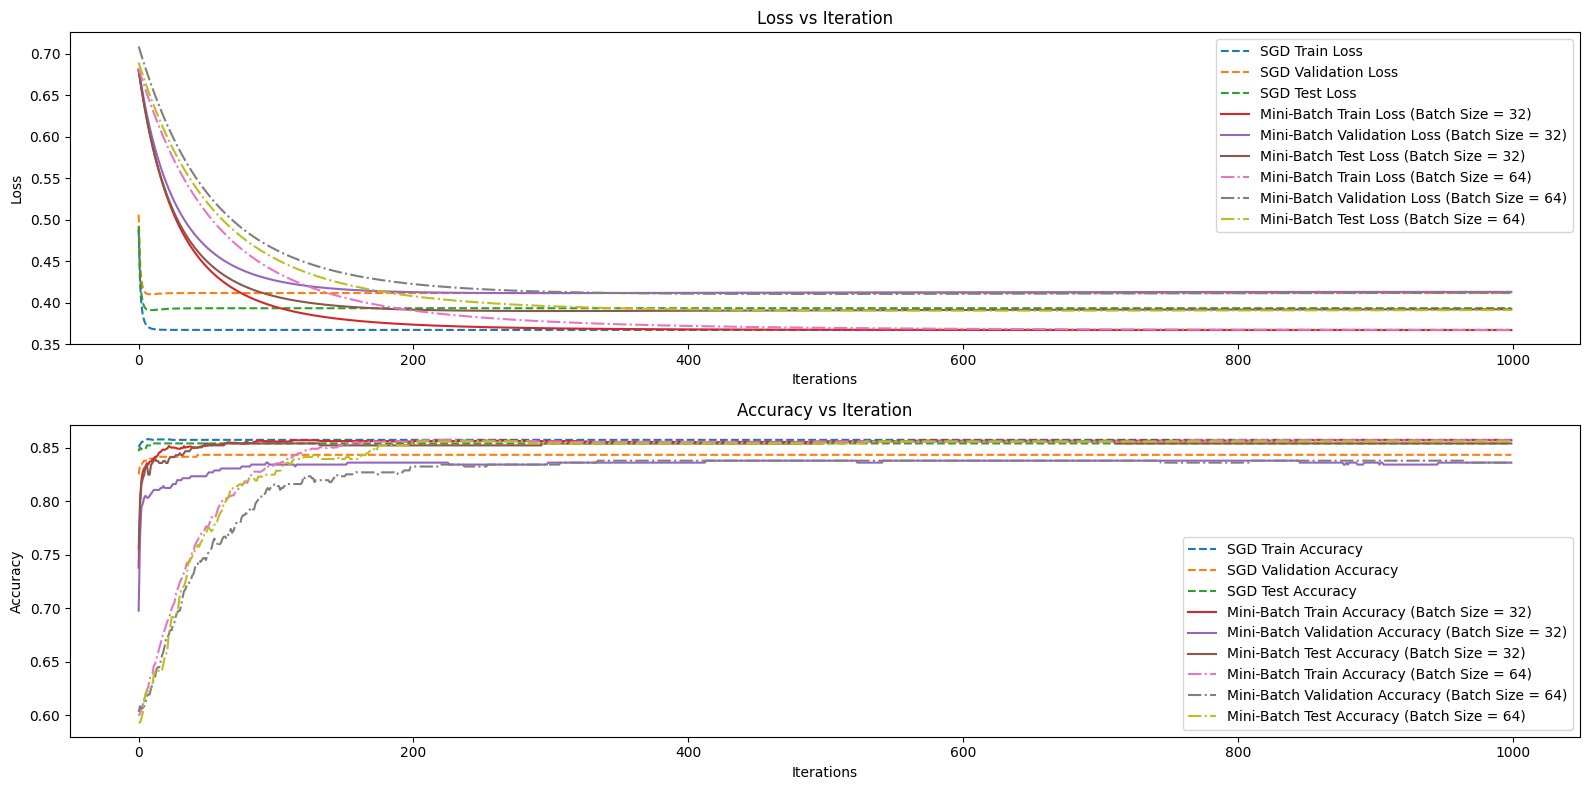

In [ ]:
# # Stochastic Gradient Descent (SGD) function
# def stochastic_gradient_descent(x_train, y_train, x_val, y_val, weights, bias, learning_rate, epochs):
#     history = {'loss': [], 'accuracy': []}
#     val_history = {'loss': [], 'accuracy': []}

#     for epoch in range(epochs):
#         # Loop through each sample in the training data
#         for i in range(x_train.shape[0]):
#             x_i = x_train.iloc[i].values.reshape(1, -1)  # Get row i as a 2D array
#             y_i = y_train.iloc[i]  # Corresponding label

#             # Forward propagation
#             y_pred_i = forward_propagation(x_i, weights, bias)

#             # Compute gradients for one sample
#             gradient_weights, gradient_bias = backward_propagation(x_i, y_i, y_pred_i)

#             # Update weights and bias
#             weights, bias = update_parameters(weights, bias, gradient_weights, gradient_bias, learning_rate)

#         # After one epoch, calculate loss and accuracy for training set
#         y_pred_train = forward_propagation(x_train, weights, bias)
#         train_loss = binary_cross_entropy(y_train, y_pred_train)
#         history['loss'].append(train_loss)

#         train_predictions = (y_pred_train >= 0.5).astype(int)
#         train_accuracy = np.mean(train_predictions == y_train)
#         history['accuracy'].append(train_accuracy)

#         # Validation step
#         y_pred_val = forward_propagation(x_val, weights, bias)
#         val_loss = binary_cross_entropy(y_val, y_pred_val)
#         val_history['loss'].append(val_loss)

#         val_predictions = (y_pred_val >= 0.5).astype(int)
#         val_accuracy = np.mean(val_predictions == y_val)
#         val_history['accuracy'].append(val_accuracy)

#         # Print every 100 epochs
#         if (epoch + 1) % 100 == 0:
#             print(f"Epoch {epoch + 1}/{epochs} - Loss: {train_loss:.4f} - Accuracy: {train_accuracy:.4f} - Val Loss: {val_loss:.4f} - Val Accuracy: {val_accuracy:.4f}")

#     return weights, bias, history, val_history

# def mini_batch_gradient_descent(x_train, y_train, x_val, y_val, weights, bias, learning_rate, epochs, batch_size):
#     history = {'loss': [], 'accuracy': []}
#     val_history = {'loss': [], 'accuracy': []}
#     num_samples = x_train.shape[0]

#     for epoch in range(epochs):
#         # Shuffle the training data at the beginning of each epoch
#         indices = np.random.permutation(num_samples)
#         x_train_shuffled = x_train.iloc[indices]  # Using .iloc for row indexing
#         y_train_shuffled = y_train.iloc[indices]

#         # Loop over mini-batches
#         for i in range(0, num_samples, batch_size):
#             x_batch = x_train_shuffled.iloc[i:i + batch_size].values  # Get mini-batch of inputs
#             y_batch = y_train_shuffled.iloc[i:i + batch_size].values  # Get mini-batch of labels

#             # Forward propagation for the mini-batch
#             y_pred_batch = forward_propagation(x_batch, weights, bias)

#             # Compute gradients for the mini-batch
#             gradient_weights, gradient_bias = backward_propagation(x_batch, y_batch, y_pred_batch)

#             # Update weights and bias
#             weights, bias = update_parameters(weights, bias, gradient_weights, gradient_bias, learning_rate)

#         # After each epoch, calculate loss and accuracy for training set
#         y_pred_train = forward_propagation(x_train, weights, bias)
#         train_loss = binary_cross_entropy(y_train, y_pred_train)
#         history['loss'].append(train_loss)

#         train_predictions = (y_pred_train >= 0.5).astype(int)
#         train_accuracy = np.mean(train_predictions == y_train)
#         history['accuracy'].append(train_accuracy)

#         # Validation step
#         y_pred_val = forward_propagation(x_val, weights, bias)
#         val_loss = binary_cross_entropy(y_val, y_pred_val)
#         val_history['loss'].append(val_loss)

#         val_predictions = (y_pred_val >= 0.5).astype(int)
#         val_accuracy = np.mean(val_predictions == y_val)
#         val_history['accuracy'].append(val_accuracy)

#         # Print every 100 epochs
#         if (epoch + 1) % 100 == 0:
#             print(f"Epoch {epoch + 1}/{epochs} - Loss: {train_loss:.4f} - Accuracy: {train_accuracy:.4f} - Val Loss: {val_loss:.4f} - Val Accuracy: {val_accuracy:.4f}")

#     return weights, bias, history, val_history


# # MAIN EXECUTION FOR PART (D)
# # Initialize parameters for both optimization methods
# weights_sgd, bias_sgd = initialize_parameters(x_train_std.shape[1])
# weights_minibatch, bias_minibatch = initialize_parameters(x_train_std.shape[1])

# # Train using Stochastic Gradient Descent
# print("\nTraining using Stochastic Gradient Descent (SGD):")
# weights_sgd, bias_sgd, history_sgd, val_history_sgd = stochastic_gradient_descent(
#     x_train_std, y_train, x_val_std, y_validation, weights_sgd, bias_sgd, learning_rate, epochs
# )

# # # Train using Mini-Batch Gradient Descent (batch size = 32)
# # batch_size = 32
# # print(f"\nTraining using Mini-Batch Gradient Descent (Batch Size = {batch_size}):")
# # weights_minibatch, bias_minibatch, history_minibatch, val_history_minibatch = mini_batch_gradient_descent(
# #     x_train_std, y_train, x_val_std, y_validation, weights_minibatch, bias_minibatch, learning_rate, epochs, batch_size
# # )

# # # Plot comparison of Stochastic Gradient Descent (SGD) and Mini-Batch Gradient Descent (Batch Size = 32)
# # plt.figure(figsize=(12, 6))

# # # Loss comparison
# # plt.subplot(1, 2, 1)
# # plt.plot(history_sgd['loss'], label='SGD Train Loss')
# # plt.plot(val_history_sgd['loss'], label='SGD Validation Loss')
# # plt.plot(history_minibatch['loss'], label='Mini-Batch Train Loss (32)')
# # plt.plot(val_history_minibatch['loss'], label='Mini-Batch Validation Loss (32)')
# # plt.title('Loss vs Iteration')
# # plt.xlabel('Iterations')
# # plt.ylabel('Loss')
# # plt.legend()

# # # Accuracy comparison
# # plt.subplot(1, 2, 2)
# # plt.plot(history_sgd['accuracy'], label='SGD Train Accuracy')
# # plt.plot(val_history_sgd['accuracy'], label='SGD Validation Accuracy')
# # plt.plot(history_minibatch['accuracy'], label='Mini-Batch Train Accuracy (32)')
# # plt.plot(val_history_minibatch['accuracy'], label='Mini-Batch Validation Accuracy (32)')
# # plt.title('Accuracy vs Iteration')
# # plt.xlabel('Iterations')
# # plt.ylabel('Accuracy')
# # plt.legend()

# # plt.show()
# batch_size_1 = 32  # First batch size
# batch_size_2 = 64  # Second batch size

# # Train using Mini-Batch Gradient Descent (Batch Size = 32)
# print(f"\nTraining using Mini-Batch Gradient Descent (Batch Size = {batch_size_1}):")
# weights_minibatch_1, bias_minibatch_1, history_minibatch_1, val_history_minibatch_1 = mini_batch_gradient_descent(
#     x_train_std, y_train, x_val_std, y_validation, weights_minibatch, bias_minibatch, learning_rate, epochs, batch_size_1
# )

# # Train using Mini-Batch Gradient Descent (Batch Size = 64)
# print(f"\nTraining using Mini-Batch Gradient Descent (Batch Size = {batch_size_2}):")
# weights_minibatch_2, bias_minibatch_2, history_minibatch_2, val_history_minibatch_2 = mini_batch_gradient_descent(
#     x_train_std, y_train, x_val_std, y_validation, weights_minibatch, bias_minibatch, learning_rate, epochs, batch_size_2
# )

# # Plot comparison of Stochastic Gradient Descent (SGD) and Mini-Batch Gradient Descent with two different batch sizes
# plt.figure(figsize=(16, 8))

# # Loss comparison for all three methods
# plt.subplot(2, 1, 1)
# plt.plot(history_sgd['loss'], label='SGD Train Loss', linestyle='--')
# plt.plot(val_history_sgd['loss'], label='SGD Validation Loss', linestyle='--')
# plt.plot(history_minibatch_1['loss'], label=f'Mini-Batch Train Loss (Batch Size = {batch_size_1})')
# plt.plot(val_history_minibatch_1['loss'], label=f'Mini-Batch Validation Loss (Batch Size = {batch_size_1})')
# plt.plot(history_minibatch_2['loss'], label=f'Mini-Batch Train Loss (Batch Size = {batch_size_2})')
# plt.plot(val_history_minibatch_2['loss'], label=f'Mini-Batch Validation Loss (Batch Size = {batch_size_2})')
# plt.title('Loss vs Iteration')
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
# plt.legend()

# # Accuracy comparison for all three methods
# plt.subplot(2, 1, 2)
# plt.plot(history_sgd['accuracy'], label='SGD Train Accuracy', linestyle='--')
# plt.plot(val_history_sgd['accuracy'], label='SGD Validation Accuracy', linestyle='--')
# plt.plot(history_minibatch_1['accuracy'], label=f'Mini-Batch Train Accuracy (Batch Size = {batch_size_1})')
# plt.plot(val_history_minibatch_1['accuracy'], label=f'Mini-Batch Validation Accuracy (Batch Size = {batch_size_1})')
# plt.plot(history_minibatch_2['accuracy'], label=f'Mini-Batch Train Accuracy (Batch Size = {batch_size_2})')
# plt.plot(val_history_minibatch_2['accuracy'], label=f'Mini-Batch Validation Accuracy (Batch Size = {batch_size_2})')
# plt.title('Accuracy vs Iteration')
# plt.xlabel('Iterations')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.tight_layout()
# plt.show()

def stochastic_gradient_descent(x_train, y_train, x_val, y_val, x_test, y_test, weights, bias, learning_rate, epochs):
    history = {'loss': [], 'accuracy': []}
    val_history = {'loss': [], 'accuracy': []}
    test_history = {'loss': [], 'accuracy': []}  # Test history tracking

    for epoch in range(epochs):
        for i in range(x_train.shape[0]):
            x_i = x_train.iloc[i].values.reshape(1, -1)  # Get row i as a 2D array
            y_i = y_train.iloc[i]  # Corresponding label

            y_pred_i = forward_propagation(x_i, weights, bias)

            gradient_weights, gradient_bias = backward_propagation(x_i, y_i, y_pred_i)

            weights, bias = update_parameters(weights, bias, gradient_weights, gradient_bias, learning_rate)

        # After one epoch, calculate loss and accuracy for training set
        y_pred_train = forward_propagation(x_train, weights, bias)
        train_loss = binary_cross_entropy(y_train, y_pred_train)
        history['loss'].append(train_loss)

        train_predictions = (y_pred_train >= 0.5).astype(int)
        train_accuracy = np.mean(train_predictions == y_train)
        history['accuracy'].append(train_accuracy)

        # Validation step
        y_pred_val = forward_propagation(x_val, weights, bias)
        val_loss = binary_cross_entropy(y_val, y_pred_val)
        val_history['loss'].append(val_loss)

        val_predictions = (y_pred_val >= 0.5).astype(int)
        val_accuracy = np.mean(val_predictions == y_val)
        val_history['accuracy'].append(val_accuracy)

        # Test step
        y_pred_test = forward_propagation(x_test, weights, bias)
        test_loss = binary_cross_entropy(y_test, y_pred_test)
        test_history['loss'].append(test_loss)

        test_predictions = (y_pred_test >= 0.5).astype(int)
        test_accuracy = np.mean(test_predictions == y_test)
        test_history['accuracy'].append(test_accuracy)

        # if (epoch + 1) % 100 == 0:
        #     print(f"Epoch {epoch + 1}/{epochs} - Loss: {train_loss:.4f} - Accuracy: {train_accuracy:.4f} - "
        #           f"Val Loss: {val_loss:.4f} - Val Accuracy: {val_accuracy:.4f} - Test Loss: {test_loss:.4f} - "
        #           f"Test Accuracy: {test_accuracy:.4f}")

    return weights, bias, history, val_history, test_history
def mini_batch_gradient_descent(x_train, y_train, x_val, y_val, x_test, y_test, weights, bias, learning_rate, epochs, batch_size):
    history = {'loss': [], 'accuracy': []}
    val_history = {'loss': [], 'accuracy': []}
    test_history = {'loss': [], 'accuracy': []}  # Test history tracking
    num_samples = x_train.shape[0]

    for epoch in range(epochs):
        # Shuffle the training data at the beginning of each epoch
        indices = np.random.permutation(num_samples)
        x_train_shuffled = x_train.iloc[indices]  # Using .iloc for row indexing
        y_train_shuffled = y_train.iloc[indices]

        for i in range(0, num_samples, batch_size):
            x_batch = x_train_shuffled.iloc[i:i + batch_size].values
            y_batch = y_train_shuffled.iloc[i:i + batch_size].values

            y_pred_batch = forward_propagation(x_batch, weights, bias)

            gradient_weights, gradient_bias = backward_propagation(x_batch, y_batch, y_pred_batch)

            weights, bias = update_parameters(weights, bias, gradient_weights, gradient_bias, learning_rate)

        # After each epoch, calculate loss and accuracy for training set
        y_pred_train = forward_propagation(x_train, weights, bias)
        train_loss = binary_cross_entropy(y_train, y_pred_train)
        history['loss'].append(train_loss)

        train_predictions = (y_pred_train >= 0.5).astype(int)
        train_accuracy = np.mean(train_predictions == y_train)
        history['accuracy'].append(train_accuracy)

        # Validation step
        y_pred_val = forward_propagation(x_val, weights, bias)
        val_loss = binary_cross_entropy(y_val, y_pred_val)
        val_history['loss'].append(val_loss)

        val_predictions = (y_pred_val >= 0.5).astype(int)
        val_accuracy = np.mean(val_predictions == y_val)
        val_history['accuracy'].append(val_accuracy)

        # Test step
        y_pred_test = forward_propagation(x_test, weights, bias)
        test_loss = binary_cross_entropy(y_test, y_pred_test)
        test_history['loss'].append(test_loss)

        test_predictions = (y_pred_test >= 0.5).astype(int)
        test_accuracy = np.mean(test_predictions == y_test)
        test_history['accuracy'].append(test_accuracy)

        # Print every 100 epochs
        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{epochs} - Loss: {train_loss:.4f} - Accuracy: {train_accuracy:.4f} - "
                  f"Val Loss: {val_loss:.4f} - Val Accuracy: {val_accuracy:.4f} - Test Loss: {test_loss:.4f} - "
                  f"Test Accuracy: {test_accuracy:.4f}")

    return weights, bias, history, val_history, test_history

# Initialize parameters for both optimization methods
weights_sgd, bias_sgd = initialize_parameters(x_train_std.shape[1])
weights_minibatch, bias_minibatch = initialize_parameters(x_train_std.shape[1])

# Train using Stochastic Gradient Descent
print("\nTraining using Stochastic Gradient Descent (SGD):")
weights_sgd, bias_sgd, history_sgd, val_history_sgd, test_history_sgd = stochastic_gradient_descent(
    x_train_std, y_train, x_val_std, y_validation, x_test_std, y_test, weights_sgd, bias_sgd, learning_rate, epochs
)

# Train using Mini-Batch Gradient Descent with Batch Size = 32
batch_size_32 = 32
print(f"\nTraining using Mini-Batch Gradient Descent (Batch Size = {batch_size_32}):")
weights_minibatch_32, bias_minibatch_32, history_minibatch_32, val_history_minibatch_32, test_history_minibatch_32 = mini_batch_gradient_descent(
    x_train_std, y_train, x_val_std, y_validation, x_test_std, y_test, weights_minibatch, bias_minibatch, learning_rate, epochs, batch_size_32
)

# Train using Mini-Batch Gradient Descent with Batch Size = 64
batch_size_64 = 64
print(f"\nTraining using Mini-Batch Gradient Descent (Batch Size = {batch_size_64}):")
weights_minibatch_64, bias_minibatch_64, history_minibatch_64, val_history_minibatch_64, test_history_minibatch_64 = mini_batch_gradient_descent(
    x_train_std, y_train, x_val_std, y_validation, x_test_std, y_test, weights_minibatch, bias_minibatch, learning_rate, epochs, batch_size_64
)

# Plot comparison of SGD and Mini-Batch Gradient Descent with test performance for two different batch sizes
plt.figure(figsize=(16, 8))

# Loss comparison for all methods
plt.subplot(2, 1, 1)
# SGD
plt.plot(history_sgd['loss'], label='SGD Train Loss', linestyle='--')
plt.plot(val_history_sgd['loss'], label='SGD Validation Loss', linestyle='--')
plt.plot(test_history_sgd['loss'], label='SGD Test Loss', linestyle='--')

plt.plot(history_minibatch_32['loss'], label=f'Mini-Batch Train Loss (Batch Size = {batch_size_32})')
plt.plot(val_history_minibatch_32['loss'], label=f'Mini-Batch Validation Loss (Batch Size = {batch_size_32})')
plt.plot(test_history_minibatch_32['loss'], label=f'Mini-Batch Test Loss (Batch Size = {batch_size_32})')

plt.plot(history_minibatch_64['loss'], label=f'Mini-Batch Train Loss (Batch Size = {batch_size_64})', linestyle='-.')
plt.plot(val_history_minibatch_64['loss'], label=f'Mini-Batch Validation Loss (Batch Size = {batch_size_64})', linestyle='-.')
plt.plot(test_history_minibatch_64['loss'], label=f'Mini-Batch Test Loss (Batch Size = {batch_size_64})', linestyle='-.')

plt.title('Loss vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

# Accuracy comparison for all methods
plt.subplot(2, 1, 2)
# SGD
plt.plot(history_sgd['accuracy'], label='SGD Train Accuracy', linestyle='--')
plt.plot(val_history_sgd['accuracy'], label='SGD Validation Accuracy', linestyle='--')
plt.plot(test_history_sgd['accuracy'], label='SGD Test Accuracy', linestyle='--')

plt.plot(history_minibatch_32['accuracy'], label=f'Mini-Batch Train Accuracy (Batch Size = {batch_size_32})')
plt.plot(val_history_minibatch_32['accuracy'], label=f'Mini-Batch Validation Accuracy (Batch Size = {batch_size_32})')
plt.plot(test_history_minibatch_32['accuracy'], label=f'Mini-Batch Test Accuracy (Batch Size = {batch_size_32})')

plt.plot(history_minibatch_64['accuracy'], label=f'Mini-Batch Train Accuracy (Batch Size = {batch_size_64})', linestyle='-.')
plt.plot(val_history_minibatch_64['accuracy'], label=f'Mini-Batch Validation Accuracy (Batch Size = {batch_size_64})', linestyle='-.')
plt.plot(test_history_minibatch_64['accuracy'], label=f'Mini-Batch Test Accuracy (Batch Size = {batch_size_64})', linestyle='-.')

plt.title('Accuracy vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



SGD converged the fastest, then mini batch gradient descent with batch size=32, then with the batch size 64.

SGD has the highest stability and then the others, but the tradeoff is that SGD takes too much time to compute and mini batch works faster, since SGD works on every vector each time.

And other than this we can infer from the graph that the test loss is more and test accuracy is less as expected because the model performs worse on unseen data.

#part e:

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import KFold

# Function to perform k-fold cross-validation
def k_fold_cross_validation(x, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    accuracies = []
    precisions = []
    recalls = []
    f1s = []

    for train_index, test_index in kf.split(x):
        x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        weights, bias = initialize_parameters(x_train_fold.shape[1])

        # Train using Gradient Descent
        weights, bias, _, _ = gradient_descent(
            x_train_fold, y_train_fold, x_test_fold, y_test_fold, weights, bias, learning_rate, epochs
        )

        # Evaluate the model on the test fold
        y_pred_prob = forward_propagation(x_test_fold, weights, bias)
        y_pred = (y_pred_prob >= 0.5).astype(int)

        accuracies.append(accuracy_score(y_test_fold, y_pred))
        precisions.append(precision_score(y_test_fold, y_pred))
        recalls.append(recall_score(y_test_fold, y_pred))
        f1s.append(f1_score(y_test_fold, y_pred))

    # Calculate average and standard deviation
    avg_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    avg_precision = np.mean(precisions)
    std_precision = np.std(precisions)
    avg_recall = np.mean(recalls)
    std_recall = np.std(recalls)
    avg_f1 = np.mean(f1s)
    std_f1 = np.std(f1s)

    print(f"Average Accuracy: {avg_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"Average Precision: {avg_precision:.4f} ± {std_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f} ± {std_recall:.4f}")
    print(f"Average F1 Score: {avg_f1:.4f} ± {std_f1:.4f}")

print("\nK-Fold Cross-Validation Results:")
k_fold_cross_validation(x_train_std, y_train, k=5)



K-Fold Cross-Validation Results:
Epoch 100/1000 - Loss: 0.6804 - Accuracy: 0.7142 - Val Loss: 0.6818 - Val Accuracy: 0.6777
Epoch 200/1000 - Loss: 0.6658 - Accuracy: 0.8065 - Val Loss: 0.6685 - Val Accuracy: 0.7988
Epoch 300/1000 - Loss: 0.6522 - Accuracy: 0.8217 - Val Loss: 0.6560 - Val Accuracy: 0.8281
Epoch 400/1000 - Loss: 0.6395 - Accuracy: 0.8290 - Val Loss: 0.6443 - Val Accuracy: 0.8242
Epoch 500/1000 - Loss: 0.6276 - Accuracy: 0.8310 - Val Loss: 0.6332 - Val Accuracy: 0.8203
Epoch 600/1000 - Loss: 0.6164 - Accuracy: 0.8344 - Val Loss: 0.6227 - Val Accuracy: 0.8262
Epoch 700/1000 - Loss: 0.6058 - Accuracy: 0.8354 - Val Loss: 0.6129 - Val Accuracy: 0.8262
Epoch 800/1000 - Loss: 0.5959 - Accuracy: 0.8363 - Val Loss: 0.6036 - Val Accuracy: 0.8281
Epoch 900/1000 - Loss: 0.5866 - Accuracy: 0.8403 - Val Loss: 0.5947 - Val Accuracy: 0.8281
Epoch 1000/1000 - Loss: 0.5777 - Accuracy: 0.8417 - Val Loss: 0.5864 - Val Accuracy: 0.8281
Epoch 100/1000 - Loss: 0.6778 - Accuracy: 0.7650 - Val 

The losses decrease as epochs progress, which suggests that the model is learning and improving over time.

and as for the accuracy:
Accuracy generally increases over epochs, indicating that the model is progressively learning to classify the training and validation data better.

validation accuracy is improving and stabilizing as the number of epochs increases, which is a good sign.

The result shows variance in precision, recall, and F1 score, which suggests that while accuracy is relatively stable, the model's performance in terms of classification of positive instances varies more across different folds

So, both the accuracy and the loss tend to show stability and improve steadily
and they remain consistent throughout the different folds which means that the model was stable.


#part f:

L1 Regularization without Early Stopping
Epoch 100/1000 - Loss: 0.6816 - Accuracy: 0.8363 - Val Loss: 0.6821 - Val Accuracy: 0.8069 - Test Loss: 0.6817 - Test Accuracy: 0.8266
Epoch 200/1000 - Loss: 0.6676 - Accuracy: 0.8437 - Val Loss: 0.6693 - Val Accuracy: 0.8124 - Test Loss: 0.6677 - Test Accuracy: 0.8285
Epoch 300/1000 - Loss: 0.6549 - Accuracy: 0.8453 - Val Loss: 0.6576 - Val Accuracy: 0.8087 - Test Loss: 0.6550 - Test Accuracy: 0.8358
Epoch 400/1000 - Loss: 0.6431 - Accuracy: 0.8464 - Val Loss: 0.6467 - Val Accuracy: 0.8124 - Test Loss: 0.6432 - Test Accuracy: 0.8339
Epoch 500/1000 - Loss: 0.6319 - Accuracy: 0.8456 - Val Loss: 0.6365 - Val Accuracy: 0.8106 - Test Loss: 0.6321 - Test Accuracy: 0.8412
Epoch 600/1000 - Loss: 0.6215 - Accuracy: 0.8476 - Val Loss: 0.6269 - Val Accuracy: 0.8142 - Test Loss: 0.6218 - Test Accuracy: 0.8394
Epoch 700/1000 - Loss: 0.6116 - Accuracy: 0.8492 - Val Loss: 0.6179 - Val Accuracy: 0.8142 - Test Loss: 0.6121 - Test Accuracy: 0.8412
Epoch 800/1000

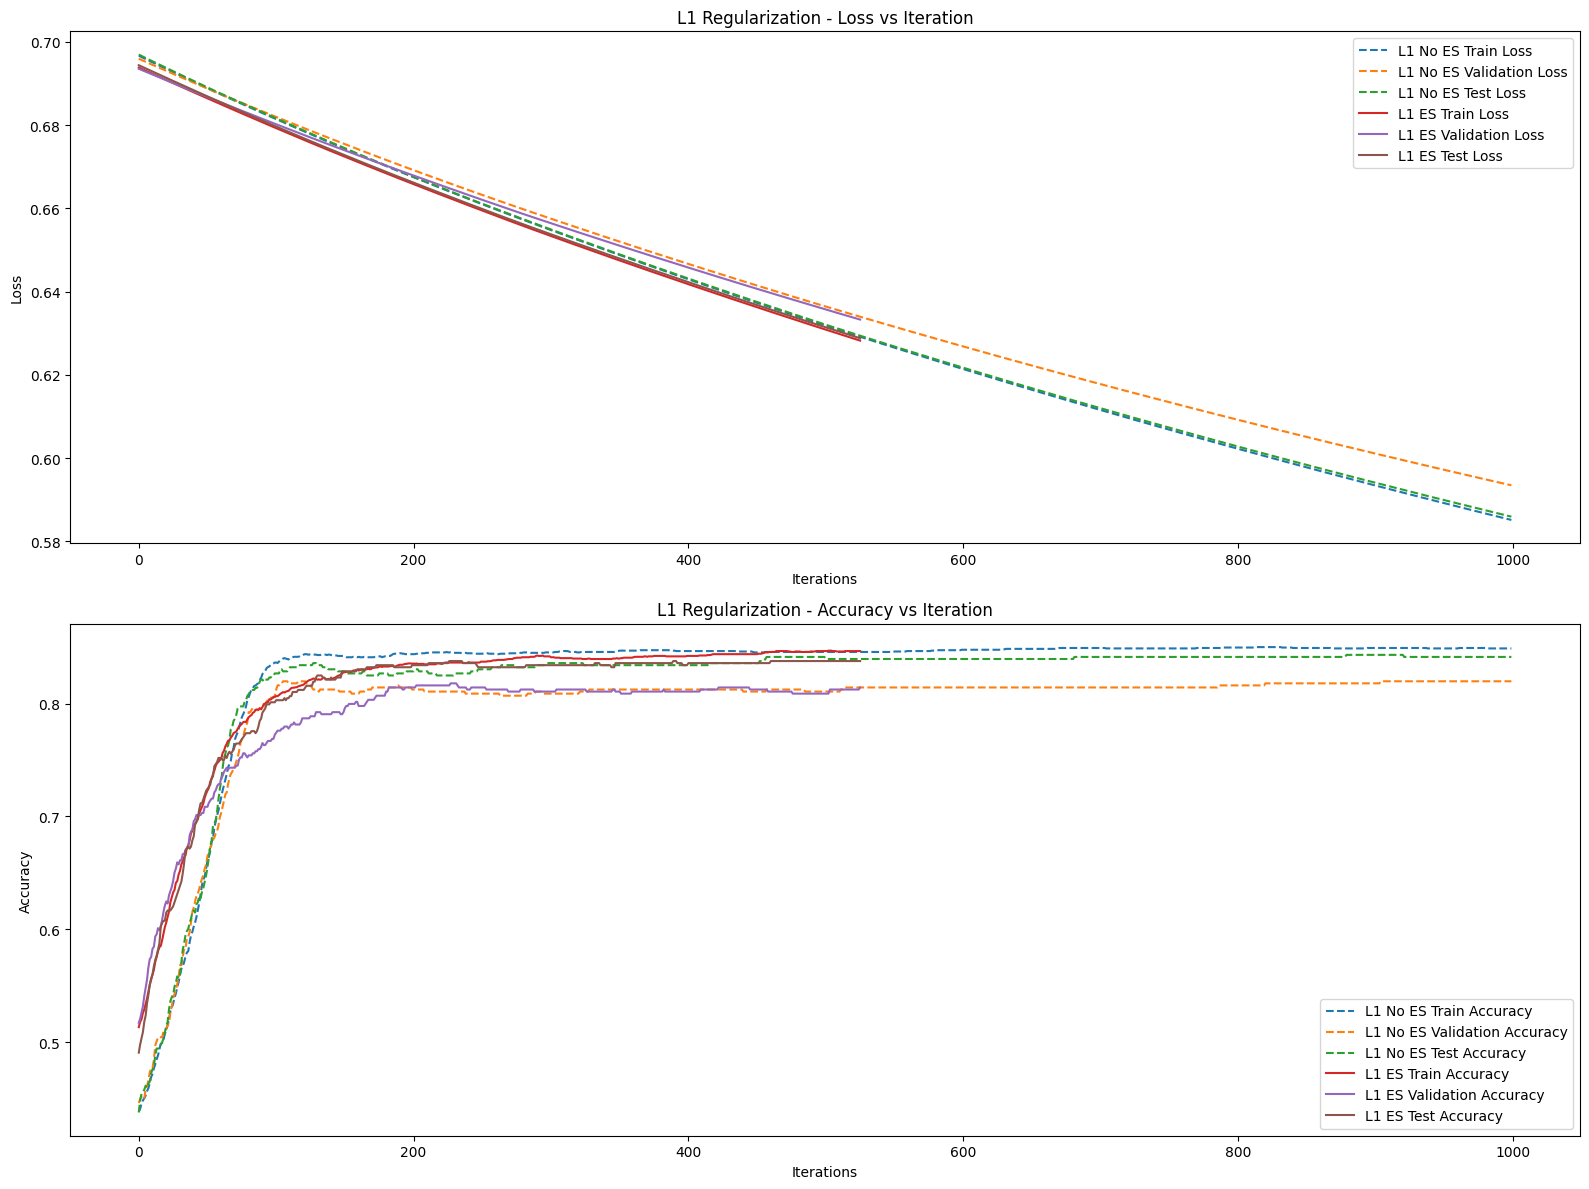

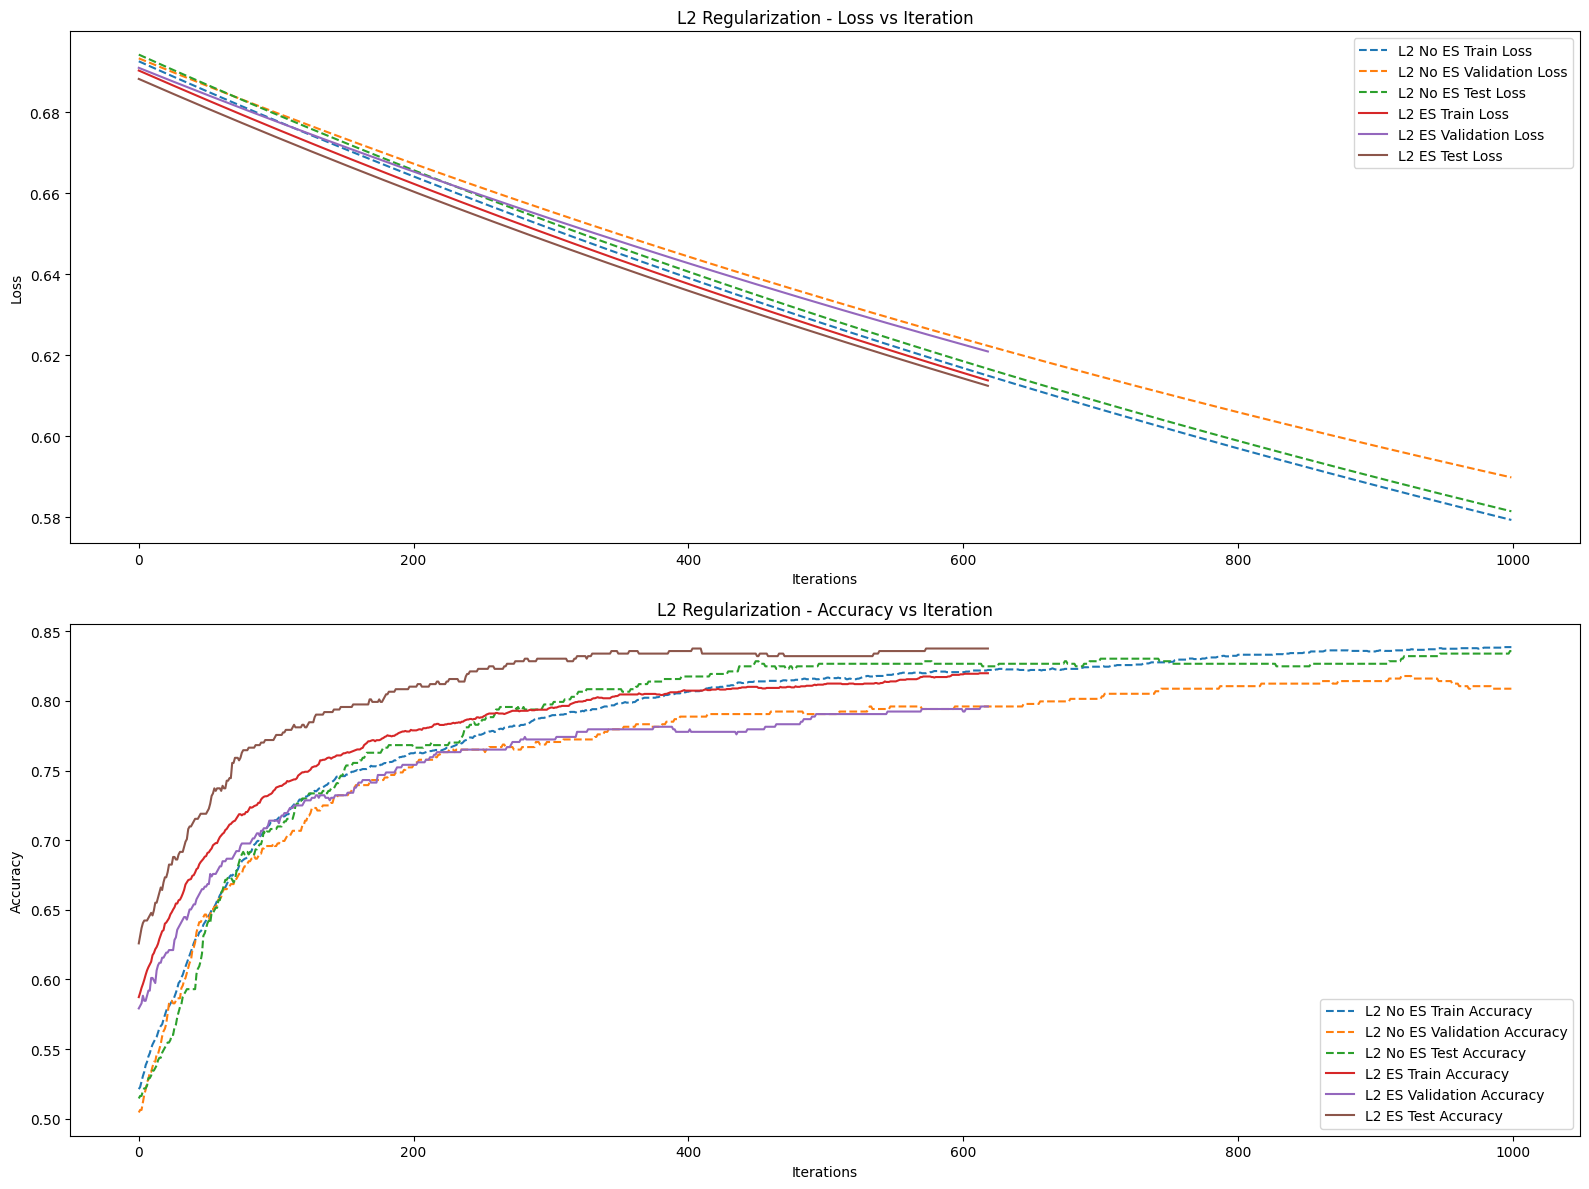

In [ ]:
# # Early Stopping implementation
# def gradient_descent_with_early_stopping(x_train, y_train, x_val, y_val, weights, bias, learning_rate, epochs,
#                                           regularization='none', reg_lambda=0.01, patience=100):
#     history = {'loss': [], 'accuracy': []}
#     val_history = {'loss': [], 'accuracy': []}
#     best_val_loss = float('inf')
#     patience_counter = 0

#     for epoch in range(epochs):
#         # Training step
#         y_pred_train = forward_propagation(x_train, weights, bias)
#         train_loss = binary_cross_entropy(y_train, y_pred_train)
#         if regularization == 'l1':
#             train_loss += reg_lambda * np.sum(np.abs(weights))
#         elif regularization == 'l2':
#             train_loss += (reg_lambda / 2) * np.sum(np.square(weights))
#         history['loss'].append(train_loss)

#         gradient_weights, gradient_bias = backward_propagation(x_train, y_train, y_pred_train)
#         if regularization == 'l1':
#             gradient_weights += reg_lambda * np.sign(weights)
#         elif regularization == 'l2':
#             gradient_weights += reg_lambda * weights
#         weights, bias = update_parameters(weights, bias, gradient_weights, gradient_bias, learning_rate)

#         train_predictions = (y_pred_train >= 0.5).astype(int)
#         train_accuracy = np.mean(train_predictions == y_train)
#         history['accuracy'].append(train_accuracy)

#         # Validation step
#         y_pred_val = forward_propagation(x_val, weights, bias)
#         val_loss = binary_cross_entropy(y_val, y_pred_val)
#         if regularization == 'l1':
#             val_loss += reg_lambda * np.sum(np.abs(weights))
#         elif regularization == 'l2':
#             val_loss += (reg_lambda / 2) * np.sum(np.square(weights))
#         val_history['loss'].append(val_loss)

#         val_predictions = (y_pred_val >= 0.5).astype(int)
#         val_accuracy = np.mean(val_predictions == y_val)
#         val_history['accuracy'].append(val_accuracy)

#         # Early Stopping
#         # if(epoch+1)%100==0:
#         #   print(best_val_loss-val_loss,"aaaaaaaaaaaaaa")
#         if best_val_loss-val_loss > 0.01:
#             best_val_loss = val_loss
#             patience_counter = 0
#         else:
#             patience_counter += 1

#         # if(epoch+1)%100==0:
#         #   print(patience_counter, patience)
#         if patience_counter >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             break

#         # Print every 100 epochs
#         if (epoch + 1) % 100 == 0:
#             print(f"Epoch {epoch + 1}/{epochs} - Loss: {train_loss:.4f} - Accuracy: {train_accuracy:.4f} - Val Loss: {val_loss:.4f} - Val Accuracy: {val_accuracy:.4f}")
#         #     print(f"Epoch {epoch + 1}: Val Loss = {val_loss:.4f}, Best Val Loss = {best_val_loss:.4f}, Patience Counter = {patience_counter}")


#     return weights, bias, history, val_history


# # Main Execution for Part (F)
# # Define learning rate, epochs, and regularization parameters
# learning_rate = 0.001
# epochs = 1000
# reg_lambda = 0.01
# patience = 100

# # L1 Regularization without Early Stopping
# print("L1 Regularization without Early Stopping")
# weights_l1_no_es, bias_l1_no_es = initialize_parameters(x_train_std.shape[1])
# weights_l1_no_es, bias_l1_no_es, history_l1_no_es, val_history_l1_no_es = gradient_descent_with_early_stopping(
#     x_train_std, y_train, x_val_std, y_validation, weights_l1_no_es, bias_l1_no_es, learning_rate, epochs,
#     regularization='l1', reg_lambda=reg_lambda, patience=epochs  # Note: Use a high patience value to simulate "no early stopping"
# )

# print("L1 Regularization with Early Stopping")
# # L1 Regularization with Early Stopping
# weights_l1_es, bias_l1_es = initialize_parameters(x_train_std.shape[1])
# weights_l1_es, bias_l1_es, history_l1_es, val_history_l1_es = gradient_descent_with_early_stopping(
#     x_train_std, y_train, x_val_std, y_validation, weights_l1_es, bias_l1_es, learning_rate, epochs,
#     regularization='l1', reg_lambda=reg_lambda, patience=patience
# )

# # L2 Regularization without Early Stopping
# print("L2 Regularization without Early Stopping")
# weights_l2_no_es, bias_l2_no_es = initialize_parameters(x_train_std.shape[1])
# weights_l2_no_es, bias_l2_no_es, history_l2_no_es, val_history_l2_no_es = gradient_descent_with_early_stopping(
#     x_train_std, y_train, x_val_std, y_validation, weights_l2_no_es, bias_l2_no_es, learning_rate, epochs,
#     regularization='l2', reg_lambda=reg_lambda, patience=epochs  # Use a high patience value to simulate "no early stopping"
# )

# # L2 Regularization with Early Stopping
# print("L2 Regularization with Early Stopping")
# weights_l2_es, bias_l2_es = initialize_parameters(x_train_std.shape[1])
# weights_l2_es, bias_l2_es, history_l2_es, val_history_l2_es = gradient_descent_with_early_stopping(
#     x_train_std, y_train, x_val_std, y_validation, weights_l2_es, bias_l2_es, learning_rate, epochs,
#     regularization='l2', reg_lambda=reg_lambda, patience=patience
# )

# # Plotting Comparison
# plt.figure(figsize=(16, 12))

# # Loss comparison
# plt.subplot(2, 1, 1)
# plt.plot(history_l1_no_es['loss'], label='L1 No ES Train Loss', linestyle='--')
# plt.plot(val_history_l1_no_es['loss'], label='L1 No ES Validation Loss', linestyle='--')
# plt.plot(history_l1_es['loss'], label='L1 ES Train Loss')
# plt.plot(val_history_l1_es['loss'], label='L1 ES Validation Loss')
# plt.plot(history_l2_no_es['loss'], label='L2 No ES Train Loss', linestyle='--')
# plt.plot(val_history_l2_no_es['loss'], label='L2 No ES Validation Loss', linestyle='--')
# plt.plot(history_l2_es['loss'], label='L2 ES Train Loss')
# plt.plot(val_history_l2_es['loss'], label='L2 ES Validation Loss')
# plt.title('Loss vs Iteration')
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
# plt.legend()

# # Accuracy comparison
# plt.subplot(2, 1, 2)
# plt.plot(history_l1_no_es['accuracy'], label='L1 No ES Train Accuracy', linestyle='--')
# plt.plot(val_history_l1_no_es['accuracy'], label='L1 No ES Validation Accuracy', linestyle='--')
# plt.plot(history_l1_es['accuracy'], label='L1 ES Train Accuracy')
# plt.plot(val_history_l1_es['accuracy'], label='L1 ES Validation Accuracy')
# plt.plot(history_l2_no_es['accuracy'], label='L2 No ES Train Accuracy', linestyle='--')
# plt.plot(val_history_l2_no_es['accuracy'], label='L2 No ES Validation Accuracy', linestyle='--')
# plt.plot(history_l2_es['accuracy'], label='L2 ES Train Accuracy')
# plt.plot(val_history_l2_es['accuracy'], label='L2 ES Validation Accuracy')
# plt.title('Accuracy vs Iteration')
# plt.xlabel('Iterations')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()



def gradient_descent_with_early_stopping(x_train, y_train, x_val, y_val, x_test, y_test, weights, bias, learning_rate, epochs,
                                          regularization='none', reg_lambda=0.01, patience=100):
    history = {'loss': [], 'accuracy': []}
    val_history = {'loss': [], 'accuracy': []}
    test_history = {'loss': [], 'accuracy': []}
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        # Training step
        y_pred_train = forward_propagation(x_train, weights, bias)
        train_loss = binary_cross_entropy(y_train, y_pred_train)
        if regularization == 'l1':
            train_loss += reg_lambda * np.sum(np.abs(weights))
        elif regularization == 'l2':
            train_loss += (reg_lambda / 2) * np.sum(np.square(weights))
        history['loss'].append(train_loss)

        gradient_weights, gradient_bias = backward_propagation(x_train, y_train, y_pred_train)
        if regularization == 'l1':
            gradient_weights += reg_lambda * np.sign(weights)
        elif regularization == 'l2':
            gradient_weights += reg_lambda * weights
        weights, bias = update_parameters(weights, bias, gradient_weights, gradient_bias, learning_rate)

        train_predictions = (y_pred_train >= 0.5).astype(int)
        train_accuracy = np.mean(train_predictions == y_train)
        history['accuracy'].append(train_accuracy)

        # Validation step
        y_pred_val = forward_propagation(x_val, weights, bias)
        val_loss = binary_cross_entropy(y_val, y_pred_val)
        if regularization == 'l1':
            val_loss += reg_lambda * np.sum(np.abs(weights))
        elif regularization == 'l2':
            val_loss += (reg_lambda / 2) * np.sum(np.square(weights))
        val_history['loss'].append(val_loss)

        val_predictions = (y_pred_val >= 0.5).astype(int)
        val_accuracy = np.mean(val_predictions == y_val)
        val_history['accuracy'].append(val_accuracy)

        # Test step
        y_pred_test = forward_propagation(x_test, weights, bias)
        test_loss = binary_cross_entropy(y_test, y_pred_test)
        if regularization == 'l1':
            test_loss += reg_lambda * np.sum(np.abs(weights))
        elif regularization == 'l2':
            test_loss += (reg_lambda / 2) * np.sum(np.square(weights))
        test_history['loss'].append(test_loss)

        test_predictions = (y_pred_test >= 0.5).astype(int)
        test_accuracy = np.mean(test_predictions == y_test)
        test_history['accuracy'].append(test_accuracy)

        # Early Stopping
        if best_val_loss - val_loss > 0.01:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

        # if (epoch + 1) % 100 == 0:
        #     print(f"Epoch {epoch + 1}/{epochs} - Loss: {train_loss:.4f} - Accuracy: {train_accuracy:.4f} - Val Loss: {val_loss:.4f} - Val Accuracy: {val_accuracy:.4f} - Test Loss: {test_loss:.4f} - Test Accuracy: {test_accuracy:.4f}")

    return weights, bias, history, val_history, test_history


learning_rate = 0.001
epochs = 1000
reg_lambda = 0.01
patience = 100

print("L1 Regularization without Early Stopping")
weights_l1_no_es, bias_l1_no_es = initialize_parameters(x_train_std.shape[1])
weights_l1_no_es, bias_l1_no_es, history_l1_no_es, val_history_l1_no_es, test_history_l1_no_es = gradient_descent_with_early_stopping(
    x_train_std, y_train, x_val_std, y_validation, x_test_std, y_test, weights_l1_no_es, bias_l1_no_es, learning_rate, epochs,
    regularization='l1', reg_lambda=reg_lambda, patience=epochs
)

print("L1 Regularization with Early Stopping")
\weights_l1_es, bias_l1_es = initialize_parameters(x_train_std.shape[1])
weights_l1_es, bias_l1_es, history_l1_es, val_history_l1_es, test_history_l1_es = gradient_descent_with_early_stopping(
    x_train_std, y_train, x_val_std, y_validation, x_test_std, y_test, weights_l1_es, bias_l1_es, learning_rate, epochs,
    regularization='l1', reg_lambda=reg_lambda, patience=patience
)

print("L2 Regularization without Early Stopping")
weights_l2_no_es, bias_l2_no_es = initialize_parameters(x_train_std.shape[1])
weights_l2_no_es, bias_l2_no_es, history_l2_no_es, val_history_l2_no_es, test_history_l2_no_es = gradient_descent_with_early_stopping(
    x_train_std, y_train, x_val_std, y_validation, x_test_std, y_test, weights_l2_no_es, bias_l2_no_es, learning_rate, epochs,
    regularization='l2', reg_lambda=reg_lambda, patience=epochs  # Use a high patience value to simulate "no early stopping"
)

print("L2 Regularization with Early Stopping")
weights_l2_es, bias_l2_es = initialize_parameters(x_train_std.shape[1])
weights_l2_es, bias_l2_es, history_l2_es, val_history_l2_es, test_history_l2_es = gradient_descent_with_early_stopping(
    x_train_std, y_train, x_val_std, y_validation, x_test_std, y_test, weights_l2_es, bias_l2_es, learning_rate, epochs,
    regularization='l2', reg_lambda=reg_lambda, patience=patience
)

# import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

plt.subplot(2, 1, 1)
plt.plot(history_l1_no_es['loss'], label='L1 No ES Train Loss', linestyle='--')
plt.plot(val_history_l1_no_es['loss'], label='L1 No ES Validation Loss', linestyle='--')
plt.plot(test_history_l1_no_es['loss'], label='L1 No ES Test Loss', linestyle='--')
plt.plot(history_l1_es['loss'], label='L1 ES Train Loss')
plt.plot(val_history_l1_es['loss'], label='L1 ES Validation Loss')
plt.plot(test_history_l1_es['loss'], label='L1 ES Test Loss')
plt.title('L1 Regularization - Loss vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history_l1_no_es['accuracy'], label='L1 No ES Train Accuracy', linestyle='--')
plt.plot(val_history_l1_no_es['accuracy'], label='L1 No ES Validation Accuracy', linestyle='--')
plt.plot(test_history_l1_no_es['accuracy'], label='L1 No ES Test Accuracy', linestyle='--')
plt.plot(history_l1_es['accuracy'], label='L1 ES Train Accuracy')
plt.plot(val_history_l1_es['accuracy'], label='L1 ES Validation Accuracy')
plt.plot(test_history_l1_es['accuracy'], label='L1 ES Test Accuracy')
plt.title('L1 Regularization - Accuracy vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 12))

plt.subplot(2, 1, 1)
plt.plot(history_l2_no_es['loss'], label='L2 No ES Train Loss', linestyle='--')
plt.plot(val_history_l2_no_es['loss'], label='L2 No ES Validation Loss', linestyle='--')
plt.plot(test_history_l2_no_es['loss'], label='L2 No ES Test Loss', linestyle='--')
plt.plot(history_l2_es['loss'], label='L2 ES Train Loss')
plt.plot(val_history_l2_es['loss'], label='L2 ES Validation Loss')
plt.plot(test_history_l2_es['loss'], label='L2 ES Test Loss')
plt.title('L2 Regularization - Loss vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history_l2_no_es['accuracy'], label='L2 No ES Train Accuracy', linestyle='--')
plt.plot(val_history_l2_no_es['accuracy'], label='L2 No ES Validation Accuracy', linestyle='--')
plt.plot(test_history_l2_no_es['accuracy'], label='L2 No ES Test Accuracy', linestyle='--')
plt.plot(history_l2_es['accuracy'], label='L2 ES Train Accuracy')
plt.plot(val_history_l2_es['accuracy'], label='L2 ES Validation Accuracy')
plt.plot(test_history_l2_es['accuracy'], label='L2 ES Test Accuracy')
plt.title('L2 Regularization - Accuracy vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()




With and without early stopping:
  Because of early stopping, the loss isn't going as low as with no early stopping, so it is affecting it a bit.

  But the accuracy is reaching at the saturation value and then stopping, in case of early stopping, as same as the case without stopping.

Effect on overfitting and generalization:
  Early stopping reduces overfitting and doing the same in our case, this helps the model generalize better to unseen data by preventing it from overfitting to specific details.

  stopping too early can lead to underfitting, where the model fails to learn important patterns, so seeing the correct stopping point is necessary.

I used early stopping using a delta value of 0.01 which doesn't let the model overfit over the dataset, the threshold value can be set by checking the loss details empirically.

It can be seen from the plots that the accuracy stops early at near a saturation value and hence require less iterations.
